In [31]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from keras.utils import np_utils  

In [32]:
def load_mnist(path, kind='train'):

    labels_path = str(path+'/{}-labels.idx1-ubyte'.format(kind))
    images_path = str(path+'/{}-images.idx3-ubyte'.format(kind))

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    
    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
        
    return images, labels

In [35]:
# read the data in the path
datapath = "D:/Program/dataset/MNIST dataset"
X_train, Y_train = load_mnist(path=datapath)
X_test, Y_test = load_mnist(path=datapath, kind="t10k")

# reshape data to number of data * pixel28*28
X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [36]:
# Data pre-processing
# Normalization  
X_train_norm = X_train/255
X_test_norm = X_test/255

# Label Onehot encoding  
Y_trainOneHot = np_utils.to_categorical(Y_train)
Y_testOneHot = np_utils.to_categorical(Y_test)

print(X_train_norm.shape)
print(X_test_norm.shape)

(60000, 28, 28)
(10000, 28, 28)


In [37]:
X_train.shape[1:]

(28, 28)

In [50]:
from keras.models import Sequential  
from keras.layers import Dense
from keras.layers import SimpleRNN

model = Sequential() 

model.add(SimpleRNN(1000,activation='relu',input_shape=X_train.shape[1:]))
model.add(Dense(units=10,activation="softmax",name="output"))
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 1000)              1029000   
_________________________________________________________________
output (Dense)               (None, 10)                10010     
Total params: 1,039,010
Trainable params: 1,039,010
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [52]:
train_history = model.fit(X_train_norm, Y_trainOneHot, validation_split=0.2, epochs=20, batch_size=200, verbose=1) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 12s - loss: 0.7797 - acc: 0.7342 - val_loss: 0.2148 - val_acc: 0.9366
Epoch 2/20
48000/48000 [==============================] - 11s - loss: 0.2188 - acc: 0.9385 - val_loss: 0.1677 - val_acc: 0.9521
Epoch 3/20
48000/48000 [==============================] - 11s - loss: 0.1652 - acc: 0.9559 - val_loss: 0.1556 - val_acc: 0.9557
Epoch 4/20
48000/48000 [==============================] - 11s - loss: 0.1264 - acc: 0.9654 - val_loss: 0.0992 - val_acc: 0.9746
Epoch 5/20
48000/48000 [==============================] - 11s - loss: 0.0955 - acc: 0.9736 - val_loss: 0.0981 - val_acc: 0.9726
Epoch 6/20
48000/48000 [==============================] - 11s - loss: 0.0925 - acc: 0.9750 - val_loss: 0.1092 - val_acc: 0.9711
Epoch 7/20
48000/48000 [==============================] - 12s - loss: 0.0923 - acc: 0.9746 - val_loss: 0.0955 - val_acc: 0.9750
Epoch 8/20
48000/48000 [==============================

In [53]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

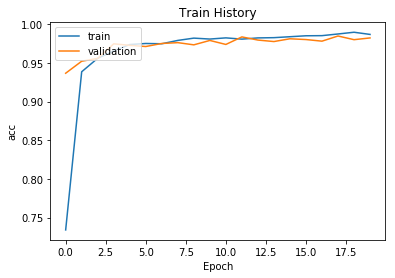

In [54]:
show_train_history(train_history, 'acc', 'val_acc')  

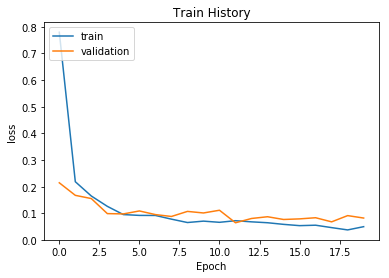

In [55]:
show_train_history(train_history, 'loss', 'val_loss') 

In [56]:
scores = model.evaluate(X_test_norm, Y_testOneHot)  
print()
print(scores)

 9984/10000 [============================>.] - ETA: 0s
[0.079847127765719783, 0.98080000000000001]


In [57]:
prediction = model.predict_classes(X_test_norm)
print()
print("Show 10 prediction result :")  
print(prediction[:10])

 9760/10000 [============================>.] - ETA: 0s
Show 10 prediction result :
[7 2 1 0 4 1 4 9 6 9]


In [58]:
import pandas as pd  
print("Display Confusion Matrix:")  
print(pd.crosstab(Y_test, prediction, rownames=['label'], colnames=['predict']))  

Display Confusion Matrix:
predict    0     1     2    3    4    5    6     7    8    9
label                                                       
0        972     0     0    0    0    0    6     1    1    0
1          0  1126     2    3    0    0    0     3    1    0
2          2     5  1012    2    1    0    3     6    1    0
3          1     1     3  996    0    5    0     2    2    0
4          0     0     1    0  967    0    4     1    1    8
5          0     0     0   13    1  872    3     0    2    1
6          5     3     0    1    2    5  942     0    0    0
7          0     1    11    0    4    1    0  1005    0    6
8          1     0    10    4    5    3    1     3  944    3
9          3     0     1    4   11    2    0    12    4  972
